In [1]:
import pandas as pd
import numpy as np
import json
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import tree
from sklearn.pipeline import Pipeline

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"youssefismail20","key":"1a6210e93b0c6c75d68ef32a07c01729"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d elvinagammed/chatbots-intent-recognition-dataset

  0% 0.00/16.9k [00:00<?, ?B/s]
100% 16.9k/16.9k [00:00<00:00, 14.8MB/s]


In [6]:
!unzip /content/chatbots-intent-recognition-dataset.zip

Archive:  /content/chatbots-intent-recognition-dataset.zip
  inflating: Intent.json             


In [7]:
#Opening JSON file
f=open('Intent.json')

#returns JSON object as  a dictionary
data=json.load(f)

data

{'intents': [{'intent': 'Greeting',
   'text': ['Hi',
    'Hi there',
    'Hola',
    'Hello',
    'Hello there',
    'Hya',
    'Hya there'],
   'responses': ['Hi human, please tell me your GeniSys user',
    'Hello human, please tell me your GeniSys user',
    'Hola human, please tell me your GeniSys user'],
   'extension': {'function': '', 'entities': False, 'responses': []},
   'context': {'in': '', 'out': 'GreetingUserRequest', 'clear': False},
   'entityType': 'NA',
   'entities': []},
  {'intent': 'GreetingResponse',
   'text': ['My user is Adam',
    'This is Adam',
    'I am Adam',
    'It is Adam',
    'My user is Bella',
    'This is Bella',
    'I am Bella',
    'It is Bella'],
   'responses': ['Great! Hi <HUMAN>! How can I help?',
    'Good! Hi <HUMAN>, how can I help you?',
    'Cool! Hello <HUMAN>, what can I do for you?',
    'OK! Hola <HUMAN>, how can I help you?',
    'OK! hi <HUMAN>, what can I do for you?'],
   'extension': {'function': 'extensions.gHumans.updateHum

In [8]:
data.keys()

dict_keys(['intents'])

In [9]:
intents_df=pd.DataFrame(data["intents"])
intents_df

,intent,text,responses,extension,context,entityType,entities
0,Greeting,"[Hi, Hi there, Hola, Hello, Hello there, Hya, ...","[Hi human, please tell me your GeniSys user, H...","{'function': '', 'entities': False, 'responses...","{'in': '', 'out': 'GreetingUserRequest', 'clea...",NA,[]
1,GreetingResponse,"[My user is Adam, This is Adam, I am Adam, It ...","[Great! Hi <HUMAN>! How can I help?, Good! Hi ...","{'function': 'extensions.gHumans.updateHuman',...","{'in': 'GreetingUserRequest', 'out': '', 'clea...",NA,"[{'entity': 'HUMAN', 'rangeFrom': 3, 'rangeTo'..."
2,CourtesyGreeting,"[How are you?, Hi how are you?, Hello how are ...","[Hello, I am great, how are you? Please tell m...","{'function': '', 'entities': False, 'responses...","{'in': '', 'out': 'CourtesyGreetingUserRequest...",NA,[]
3,CourtesyGreetingResponse,"[Good thanks! My user is Adam, Good thanks! Th...","[Great! Hi <HUMAN>! How can I help?, Good! Hi ...","{'function': 'extensions.gHumans.updateHuman',...","{'in': 'GreetingUserRequest', 'out': '', 'clea...",NA,"[{'entity': 'HUMAN', 'rangeFrom': 5, 'rangeTo'..."
4,CurrentHumanQuery,"[What is my name?, What do you call me?, Who d...","[You are <HUMAN>! How can I help?, Your name i...",{'function': 'extensions.gHumans.getCurrentHum...,"{'in': '', 'out': 'CurrentHumanQuery', 'clear'...",NA,[]
5,NameQuery,"[What is your name?, What could I call you?, W...","[You can call me Geni, You may call me Geni, C...","{'function': '', 'entities': False, 'responses...","{'in': '', 'out': '', 'clear': False}",NA,[]
6,RealNameQuery,"[What is your real name?, What is your real na...","[My name is GeniSys, GeniSys, My real name is ...","{'function': '', 'entities': False, 'responses...","{'in': '', 'out': '', 'clear': False}",NA,[]
7,TimeQuery,"[What is the time?, What's the time?, Do you k...","[One moment, One sec, One second]","{'function': 'extensions.gTime.getTime', 'enti...","{'in': '', 'out': '', 'clear': False}",NA,[]
8,Thanks,"[OK thank you, OK thanks, OK, Thanks, Thank yo...","[No problem!, Happy to help!, Any time!, My pl...","{'function': '', 'entities': False, 'responses...","{'in': '', 'out': '', 'clear': False}",NA,[]
9,NotTalking2U,"[I am not talking to you, I was not talking to...","[OK, No problem, Right]","{'function': '', 'entities': False, 'responses...","{'in': '', 'out': '', 'clear': False}",NA,[]


In [10]:
Dataset=intents_df[['intent','text','responses']]
Dataset

,intent,text,responses
0,Greeting,"[Hi, Hi there, Hola, Hello, Hello there, Hya, ...","[Hi human, please tell me your GeniSys user, H..."
1,GreetingResponse,"[My user is Adam, This is Adam, I am Adam, It ...","[Great! Hi <HUMAN>! How can I help?, Good! Hi ..."
2,CourtesyGreeting,"[How are you?, Hi how are you?, Hello how are ...","[Hello, I am great, how are you? Please tell m..."
3,CourtesyGreetingResponse,"[Good thanks! My user is Adam, Good thanks! Th...","[Great! Hi <HUMAN>! How can I help?, Good! Hi ..."
4,CurrentHumanQuery,"[What is my name?, What do you call me?, Who d...","[You are <HUMAN>! How can I help?, Your name i..."
5,NameQuery,"[What is your name?, What could I call you?, W...","[You can call me Geni, You may call me Geni, C..."
6,RealNameQuery,"[What is your real name?, What is your real na...","[My name is GeniSys, GeniSys, My real name is ..."
7,TimeQuery,"[What is the time?, What's the time?, Do you k...","[One moment, One sec, One second]"
8,Thanks,"[OK thank you, OK thanks, OK, Thanks, Thank yo...","[No problem!, Happy to help!, Any time!, My pl..."
9,NotTalking2U,"[I am not talking to you, I was not talking to...","[OK, No problem, Right]"


In [11]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   intent     22 non-null     object
 1   text       22 non-null     object
 2   responses  22 non-null     object
dtypes: object(3)
memory usage: 656.0+ bytes


In [12]:
Dataset.describe()

,intent,text,responses
count,22,22,22
unique,22,22,21
top,Greeting,"[Hi, Hi there, Hola, Hello, Hello there, Hya, ...","[Great! Hi <HUMAN>! How can I help?, Good! Hi ..."
freq,1,1,2


In [13]:
with open("Intent.json") as diabetes_dataset:
  dataset = json.load(diabetes_dataset)

In [14]:
def processing_json_dataset(dataset):
  Intent = []
  inputs = []
  responses={}
  for intent in dataset['intents']:
    responses[intent['intent']]=intent['responses']
    for lines in intent['text']:
      inputs.append(lines)
      Intent.append(intent['intent'])
  return [Intent, inputs, responses]

In [15]:
[Intent, inputs, responses] = processing_json_dataset(dataset)

In [16]:
Dataset_1 = pd.DataFrame({"inputs":inputs , "Intent":Intent})

In [17]:
Dataset_1

,inputs,Intent
0,Hi,Greeting
1,Hi there,Greeting
2,Hola,Greeting
3,Hello,Greeting
4,Hello there,Greeting
...,...,...
138,Can you prove you have a conscious,SelfAware
139,Can you prove you are self-aware please,SelfAware
140,Can you prove you are self aware please,SelfAware
141,Can you prove you have a conscious please,SelfAware


In [18]:
Dataset_1['inputs'] = Dataset_1['inputs'].apply(lambda sequence: [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])
Dataset_1

,inputs,Intent
0,"[h, i]",Greeting
1,"[h, i, , t, h, e, r, e]",Greeting
2,"[h, o, l, a]",Greeting
3,"[h, e, l, l, o]",Greeting
4,"[h, e, l, l, o, , t, h, e, r, e]",Greeting
...,...,...
138,"[c, a, n, , y, o, u, , p, r, o, v, e, , y, ...",SelfAware
139,"[c, a, n, , y, o, u, , p, r, o, v, e, , y, ...",SelfAware
140,"[c, a, n, , y, o, u, , p, r, o, v, e, , y, ...",SelfAware
141,"[c, a, n, , y, o, u, , p, r, o, v, e, , y, ...",SelfAware


In [19]:
Dataset_1['inputs'] = Dataset_1['inputs'].apply(lambda wrd: ''.join(wrd))
Dataset_1

,inputs,Intent
0,hi,Greeting
1,hi there,Greeting
2,hola,Greeting
3,hello,Greeting
4,hello there,Greeting
...,...,...
138,can you prove you have a conscious,SelfAware
139,can you prove you are selfaware please,SelfAware
140,can you prove you are self aware please,SelfAware
141,can you prove you have a conscious please,SelfAware


In [20]:
Dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   inputs  143 non-null    object
 1   Intent  143 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [21]:
Dataset_1.describe()

,inputs,Intent
count,143,143
unique,142,22
top,your real name please,CourtesyGreetingResponse
freq,2,8


In [22]:
Dataset_1['Intent'].value_counts()

CourtesyGreetingResponse    8
GreetingResponse            8
Greeting                    7
NotTalking2U                7
PodBayDoorResponse          7
PodBayDoor                  7
Clever                      7
Shutup                      7
TimeQuery                   7
RealNameQuery               7
CurrentHumanQuery           7
CourtesyGreeting            7
SelfAware                   7
Thanks                      6
UnderstandQuery             6
CourtesyGoodBye             6
WhoAmI                      6
NameQuery                   6
Gossip                      6
Jokes                       6
Swearing                    4
GoodBye                     4
Name: Intent, dtype: int64

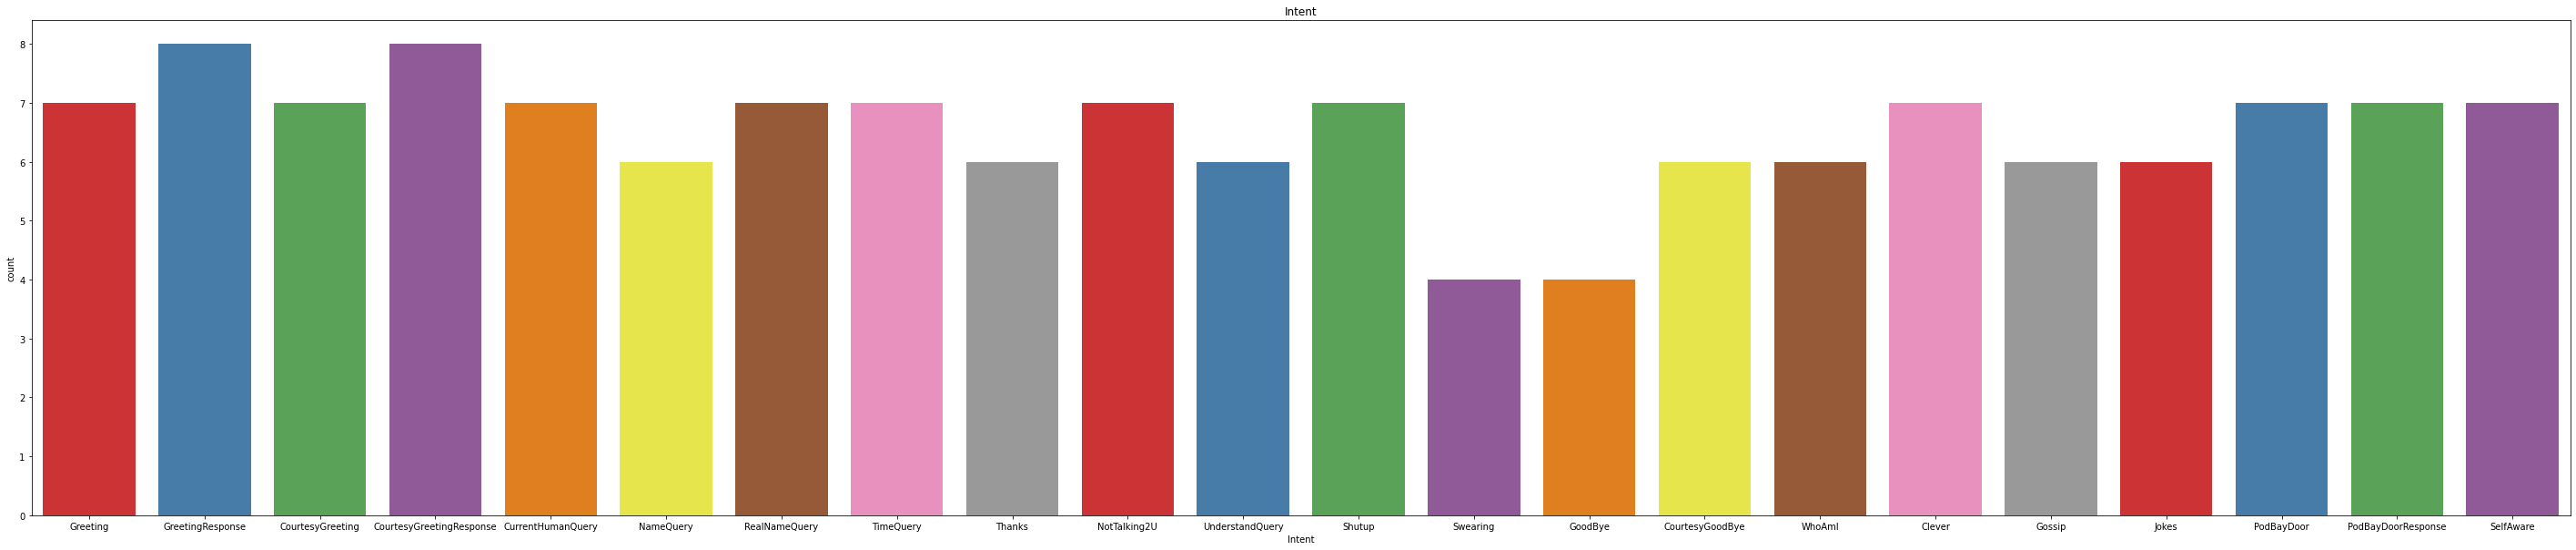

In [23]:
plt.figure(figsize=(50,10))
sns.countplot(data= Dataset_1, x=Dataset_1['Intent'], palette="Set1").set(title="Intent");

In [24]:
Dataset_1.shape

(143, 2)

In [25]:
# from textblob.en import sentiment
# from textblob import TextBlob
# def get_sentiment(text):
#   blob=TextBlob(text)
#   sentiment=blob.sentiment.polarity

#   if sentiment > 0 :
#     result='Positive'

#   elif sentiment < 0 :
#     result='Negative'

#   else:
#     result='Neutral'
#   return(result)

In [26]:
# print(get_sentiment("I love coding"))

In [27]:
# Dataset_1['Sentiment']=Dataset_1['inputs'].apply(get_sentiment)

In [28]:
#Dataset_1

In [29]:
# (Dataset_1['Sentiment'].value_counts()) / len(Dataset_1) * 100

In [30]:
#(Dataset_1['Intent'].value_counts()) / len(Dataset_1) * 100

In [31]:
# Dataset_1=Dataset_1.groupby('Intent', group_keys=False).apply(lambda x: x.sample(min(len(x), 2)))
# Dataset_1

In [32]:
#Dataset_1.shape

In [33]:
#(Dataset_1['Intent'].value_counts()) / len(Dataset_1) * 100

In [34]:
#Shuffling
Dataset_1=Dataset_1.sample(frac = 1)
Dataset_1

,inputs,Intent
93,thank you bye,CourtesyGoodBye
28,great thanks i am bella,CourtesyGreetingResponse
136,can you prove you are selfaware,SelfAware
91,thanks bye,CourtesyGoodBye
96,thanks good bye,CourtesyGoodBye
...,...,...
114,any gossip,Gossip
88,adios,GoodBye
68,wasnt communicating to you,NotTalking2U
20,hope you are doing well,CourtesyGreeting


In [35]:
def processing_json_dataset(dataset): #inputs and responses
  tags = {}
  inputs = []
  responses=[]
  for intent in dataset['intents']:
    tags[intent['intent']]=intent['text']
    for lines in intent['text']:
      inputs.append(lines)
      responses.append(intent['responses'])
  return [tags, inputs, responses]

In [36]:
[tags, inputs, responses] = processing_json_dataset(dataset)

In [37]:
Dataset_2 = pd.DataFrame({"inputs":inputs,
                     "responses":responses})

In [38]:
Dataset_2

,inputs,responses
0,Hi,"[Hi human, please tell me your GeniSys user, H..."
1,Hi there,"[Hi human, please tell me your GeniSys user, H..."
2,Hola,"[Hi human, please tell me your GeniSys user, H..."
3,Hello,"[Hi human, please tell me your GeniSys user, H..."
4,Hello there,"[Hi human, please tell me your GeniSys user, H..."
...,...,...
138,Can you prove you have a conscious,"[That is an interesting question, can you prov..."
139,Can you prove you are self-aware please,"[That is an interesting question, can you prov..."
140,Can you prove you are self aware please,"[That is an interesting question, can you prov..."
141,Can you prove you have a conscious please,"[That is an interesting question, can you prov..."


In [39]:
import string
Dataset_2['inputs'] = Dataset_2['inputs'].apply(lambda sequence:  [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])
Dataset_2['responses'] = Dataset_2['responses'].apply(lambda sequence:  [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])

In [40]:
Dataset_2

,inputs,responses
0,"[h, i]","[hi human, please tell me your genisys user, h..."
1,"[h, i, , t, h, e, r, e]","[hi human, please tell me your genisys user, h..."
2,"[h, o, l, a]","[hi human, please tell me your genisys user, h..."
3,"[h, e, l, l, o]","[hi human, please tell me your genisys user, h..."
4,"[h, e, l, l, o, , t, h, e, r, e]","[hi human, please tell me your genisys user, h..."
...,...,...
138,"[c, a, n, , y, o, u, , p, r, o, v, e, , y, ...","[that is an interesting question, can you prov..."
139,"[c, a, n, , y, o, u, , p, r, o, v, e, , y, ...","[that is an interesting question, can you prov..."
140,"[c, a, n, , y, o, u, , p, r, o, v, e, , y, ...","[that is an interesting question, can you prov..."
141,"[c, a, n, , y, o, u, , p, r, o, v, e, , y, ...","[that is an interesting question, can you prov..."


In [41]:
Dataset_2['inputs'] = Dataset_2['inputs'].apply(lambda wrd: ''.join(wrd))
Dataset_2['responses'] = Dataset_2['responses'].apply(lambda wrd: ''.join(wrd))

In [42]:
Dataset_2

,inputs,responses
0,hi,"hi human, please tell me your genisys userhell..."
1,hi there,"hi human, please tell me your genisys userhell..."
2,hola,"hi human, please tell me your genisys userhell..."
3,hello,"hi human, please tell me your genisys userhell..."
4,hello there,"hi human, please tell me your genisys userhell..."
...,...,...
138,can you prove you have a conscious,"that is an interesting question, can you prove..."
139,can you prove you are selfaware please,"that is an interesting question, can you prove..."
140,can you prove you are self aware please,"that is an interesting question, can you prove..."
141,can you prove you have a conscious please,"that is an interesting question, can you prove..."


# Decision Tree Model (Youssef)

Prediction of Intents

In [43]:
# Features & Labels
# features = ['inputs', 'Sentiment']
Xfeatures = Dataset_1['inputs']
ylabels = Dataset_1['Intent']

In [44]:
Xfeatures

93                       thank you bye
28             great thanks i am bella
136    can you prove you are selfaware
91                          thanks bye
96                     thanks good bye
                    ...               
114                         any gossip
88                               adios
68          wasnt communicating to you
20             hope you are doing well
110          i am bored gossip with me
Name: inputs, Length: 143, dtype: object

In [45]:
#Vectrizer
cv=CountVectorizer()
X=cv.fit_transform(Xfeatures)

In [46]:
#Get Features by Name
cv.get_feature_names_out()

array(['about', 'adam', 'adios', 'am', 'any', 'anyone', 'are', 'aware',
       'bay', 'be', 'bella', 'bored', 'by', 'bye', 'call', 'camera',
       'can', 'cheering', 'clever', 'communicating', 'comprendo',
       'conscious', 'could', 'do', 'doing', 'door', 'enough', 'for',
       'friends', 'fuck', 'genious', 'get', 'girl', 'give', 'good',
       'goodbye', 'gossip', 'got', 'great', 'have', 'hear', 'hello',
       'help', 'helpful', 'hi', 'hola', 'hope', 'how', 'hya', 'identify',
       'in', 'intelligent', 'is', 'it', 'joke', 'jokes', 'know', 'later',
       'laugh', 'make', 'me', 'mean', 'meant', 'more', 'my', 'name',
       'need', 'not', 'off', 'ok', 'open', 'please', 'pod', 'prove',
       'quiet', 'real', 'saying', 'see', 'self', 'selfaware', 'shhh',
       'shit', 'shut', 'some', 'speaking', 'stop', 'surely', 'talking',
       'tell', 'thank', 'thanks', 'thats', 'the', 'there', 'think',
       'this', 'time', 'to', 'twat', 'understand', 'up', 'user', 'very',
       'want', 'wa

In [47]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)
clf = tree.DecisionTreeClassifier()

In [48]:
#Decision Tree Pipeline
#pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',clf)])

In [49]:
# cv = KFold(n_splits=(folds - 1))
# scores = cross_val_score(pipeline, x_train, y_train, cv = cv)

In [50]:
# Train and Fit Data
# pipeline .fit(x_train,y_train)
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred=clf.predict(x_test)
y_pred

array(['CourtesyGoodBye', 'Greeting', 'WhoAmI', 'Greeting', 'Clever',
       'Greeting', 'SelfAware', 'Greeting', 'Clever', 'Greeting',
       'Greeting', 'Greeting', 'NameQuery', 'CourtesyGreetingResponse',
       'Greeting', 'Clever', 'Greeting', 'CourtesyGreeting',
       'CurrentHumanQuery', 'Gossip', 'CurrentHumanQuery',
       'CurrentHumanQuery', 'PodBayDoorResponse', 'Greeting', 'Greeting',
       'Clever', 'CourtesyGreeting', 'CourtesyGoodBye',
       'GreetingResponse', 'SelfAware', 'NotTalking2U', 'Clever',
       'CourtesyGoodBye', 'PodBayDoor', 'NotTalking2U',
       'GreetingResponse', 'TimeQuery', 'WhoAmI', 'PodBayDoor',
       'CourtesyGreetingResponse', 'CourtesyGreetingResponse',
       'NameQuery', 'NameQuery'], dtype=object)

In [52]:
#pipeline 

In [53]:
# Check Accuracy
# pipe_lr.score(x_test,y_test)
Accuracy_DT_I = clf.score(x_test,y_test)
Accuracy_DT_I


0.5581395348837209

In [54]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
#print('F1 Score:', metrics.f1_score(y_test, y_pred))

Accuracy Score: 0.5581395348837209
Confusion matrix:
 [[3 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]]


In [55]:
# Make A Prediction
# ex1 = "can you prove you have a conscious"
# pipe_lr.predict([ex1])

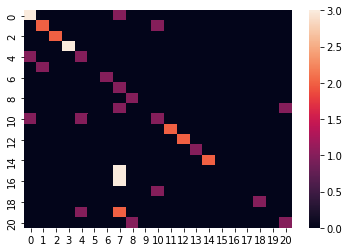

In [56]:
cf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(cf_matrix, annot=False)

Prediction of responses

In [57]:
Xfeatures = Dataset_2['inputs']
ylabels = Dataset_2['responses']

In [58]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.4,random_state=42)
clf = tree.DecisionTreeClassifier(random_state=0)

In [59]:
# Decision Tree Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',clf)])

In [60]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', DecisionTreeClassifier(random_state=0))])

In [61]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', DecisionTreeClassifier(random_state=0))])

In [62]:
# Check Accuracy
Accuracy_DT_R=pipe_lr.score(x_test,y_test)
Accuracy_DT_R

0.5862068965517241

In [63]:
# Make A Prediction
ex1 = "can you prove you have a conscious"
pipe_lr.predict([ex1])

array(['that is an interesting question, can you prove that you are?that is an difficult question, can you prove that you are?that depends, can you prove that you are?'],
      dtype=object)

# SVM Model (Ali)

Prediction of Intents (tags)

In [64]:
Xfeatures = Dataset_1['inputs']
ylabels = Dataset_1['Intent']

In [65]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [66]:
from sklearn.svm import SVC
model_1=SVC(kernel='linear',random_state=0)

In [67]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',model_1)])

In [68]:
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', SVC(kernel='linear', random_state=0))])

In [69]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', SVC(kernel='linear', random_state=0))])

In [70]:
# Check Accuracy
Accuracy_SVM_I=pipe_lr.score(x_test,y_test)
Accuracy_SVM_I

0.627906976744186

In [71]:
# Make A Prediction
ex1 = "can you prove you have a conscious"
pipe_lr.predict([ex1])

array(['SelfAware'], dtype=object)

In [72]:
# To Know the available classes
pipe_lr.classes_

array(['Clever', 'CourtesyGoodBye', 'CourtesyGreeting',
       'CourtesyGreetingResponse', 'CurrentHumanQuery', 'GoodBye',
       'Gossip', 'Greeting', 'GreetingResponse', 'Jokes', 'NameQuery',
       'NotTalking2U', 'PodBayDoor', 'PodBayDoorResponse',
       'RealNameQuery', 'SelfAware', 'Shutup', 'Swearing', 'Thanks',
       'TimeQuery', 'UnderstandQuery', 'WhoAmI'], dtype=object)

Prediction of Responses

In [73]:
Xfeatures = Dataset_2['inputs']
ylabels = Dataset_2['responses']

In [74]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [75]:
model_1=SVC(kernel='linear',random_state=0)

In [76]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',model_1)])

In [77]:
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', SVC(kernel='linear', random_state=0))])

In [78]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', SVC(kernel='linear', random_state=0))])

In [79]:
# Check Accuracy
Accuracy_SVM_R=pipe_lr.score(x_test,y_test)
Accuracy_SVM_R

0.7209302325581395

In [80]:
# Make A Prediction
ex1 = "can you prove you have a conscious"
pipe_lr.predict([ex1])

array(['that is an interesting question, can you prove that you are?that is an difficult question, can you prove that you are?that depends, can you prove that you are?'],
      dtype=object)

In [81]:
# To Know the available classes
#pipe_lr.classes_

# KNN (Suhaila)

In [82]:
Xfeatures = Dataset_1['inputs']
ylabels = Dataset_1['Intent']

In [83]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=0)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5, metric= 'euclidean')# sqrt of num of data points (43)

In [85]:
#KNN Pipeline
pipe_knn = Pipeline(steps=[('cv',CountVectorizer()),('KNN',knn)])

In [86]:
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', SVC(kernel='linear', random_state=0))])

In [87]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', SVC(kernel='linear', random_state=0))])

In [88]:
# Check Accuracy
Accuracy_KNN_I=pipe_lr.score(x_test,y_test)
Accuracy_KNN_I

0.6511627906976745

In [89]:
# Make A Prediction
ex1 = "can you prove you have a conscious"
pipe_lr.predict([ex1])

array(['SelfAware'], dtype=object)

Predicting Responses

In [90]:
Xfeatures = Dataset_2['inputs']
ylabels = Dataset_2['responses']

In [91]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=0)

In [92]:
knn= KNeighborsClassifier(n_neighbors=5, metric= 'euclidean')# sqrt of num of data points (43)

In [93]:
pipe_knn = Pipeline(steps=[('cv',CountVectorizer()),('KNN',knn)])

In [94]:
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', SVC(kernel='linear', random_state=0))])

In [95]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', SVC(kernel='linear', random_state=0))])

In [96]:
# Check Accuracy
Accuracy_KNN_R=pipe_lr.score(x_test,y_test)
Accuracy_KNN_R

0.6744186046511628

In [97]:
# Make A Prediction
ex1 = "can you prove you have a conscious"
pipe_lr.predict([ex1])

array(['that is an interesting question, can you prove that you are?that is an difficult question, can you prove that you are?that depends, can you prove that you are?'],
      dtype=object)

#Naive Bayes (Kareem)

Prediction of Intent

In [98]:
from sklearn.naive_bayes import GaussianNB
gNB = GaussianNB()

In [99]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [100]:
# Build Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [101]:
from sklearn.preprocessing import FunctionTransformer
pipeline = make_pipeline( CountVectorizer(), FunctionTransformer(lambda x_train: x_train.todense(), accept_sparse=True), gNB )

In [102]:
# Train and Fit Data
pipeline.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('functiontransformer',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x7fda28a59ee0>)),
                ('gaussiannb', GaussianNB())])

In [103]:
pipeline

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('functiontransformer',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x7fda28a59ee0>)),
                ('gaussiannb', GaussianNB())])

In [104]:
#Check Accuracy
Accuracy_NB_I=pipeline.score(x_test,y_test)
Accuracy_NB_I

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.7906976744186046

In [105]:
# Make A Prediction
ex1 = "hola how are you"
pipeline.predict([ex1])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array(['hello, i am great, how are you? please tell me your genisys userhello, how are you? i am great thanks! please tell me your genisys userhello, i am good thank you, how are you? please tell me your genisys userhi, i am great, how are you? please tell me your genisys userhi, how are you? i am great thanks! please tell me your genisys userhi, i am good thank you, how are you? please tell me your genisys userhi, good thank you, how are you? please tell me your genisys user'],
      dtype='<U24754')

In [106]:
# To Know the classes
#pipeline.classes_

Prediction of Responses

In [107]:
Xfeatures = Dataset_2['inputs']
ylabels = Dataset_2['responses']

In [108]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [109]:
gNB = GaussianNB()

In [110]:
pipeline = make_pipeline( CountVectorizer(), FunctionTransformer(lambda x_train: x_train.todense(), accept_sparse=True), gNB )

In [111]:
pipeline.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('functiontransformer',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x7fda264e3dc0>)),
                ('gaussiannb', GaussianNB())])

In [112]:
pipeline

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('functiontransformer',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x7fda264e3dc0>)),
                ('gaussiannb', GaussianNB())])

In [113]:
# Check Accuracy
Accuracy_NB_R=pipeline.score(x_test,y_test)
Accuracy_NB_R

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.7906976744186046

In [114]:
# Make A Prediction
ex1 = "hola how are you"
pipeline.predict([ex1])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array(['hello, i am great, how are you? please tell me your genisys userhello, how are you? i am great thanks! please tell me your genisys userhello, i am good thank you, how are you? please tell me your genisys userhi, i am great, how are you? please tell me your genisys userhi, how are you? i am great thanks! please tell me your genisys userhi, i am good thank you, how are you? please tell me your genisys userhi, good thank you, how are you? please tell me your genisys user'],
      dtype='<U24754')

# Logistic Regression(Salma)

In [115]:
Xfeatures = Dataset_1['inputs']
ylabels = Dataset_1['Intent']

In [116]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=0)

In [117]:
from sklearn.linear_model import LogisticRegression
#The LogisticRegression class can be configured for multinomial logistic regression by 
#setting the “multi_class” argument to “multinomial” and the “solver” argument to a solver 
#that supports multinomial logistic regression, such as “lbfgs“.

# define the multinomial logistic regression model
logisticRegr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [118]:
#LogRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',logisticRegr)])

In [119]:
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(multi_class='multinomial'))])

In [120]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(multi_class='multinomial'))])

In [133]:
# Check Accuracy
Accuracy_LG_I=pipe_lr.score(x_test,y_test)
Accuracy_LG_I

0.7209302325581395

In [122]:
# Make A Prediction
ex1 = "can you prove you have a conscious"
pipe_lr.predict([ex1])

array(['SelfAware'], dtype=object)

Prediction Of Responses

In [123]:
Xfeatures = Dataset_2['inputs']
ylabels = Dataset_2['responses']

In [124]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [125]:
logisticRegr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [126]:
#LogRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',logisticRegr)])

In [127]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(multi_class='multinomial'))])

In [128]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(multi_class='multinomial'))])

In [134]:
# Check Accuracy
Accuracy_LG_R=pipe_lr.score(x_test,y_test)
Accuracy_LG_R

0.7209302325581395

In [130]:
# Make A Prediction
ex1 = "can you prove you have a conscious"
pipe_lr.predict([ex1])

array(['that is an interesting question, can you prove that you are?that is an difficult question, can you prove that you are?that depends, can you prove that you are?'],
      dtype=object)

Evaluation ( Averaging  models accuracy )

In [138]:
#  Model averaging: Instead of picking a single model, it might be better to do a weighted average over the best fit models.

Results of Intent Prediction

In [139]:
Accuracy_DT_I

0.5581395348837209

In [140]:
Accuracy_SVM_I

0.627906976744186

In [141]:
Accuracy_KNN_I

0.6511627906976745

In [142]:
Accuracy_NB_I

0.7906976744186046

In [143]:
Accuracy_LG_I

0.7209302325581395

In [144]:
Models_Accuracy_Average_Dataset_1=((Accuracy_DT_I)+(Accuracy_SVM_I)+(Accuracy_KNN_I)+(Accuracy_NB_I)+(Accuracy_LG_I))/5
Models_Accuracy_Average_Dataset_1

0.6697674418604651

Results of Responses Prediction

In [145]:
Accuracy_DT_R

0.5862068965517241

In [146]:
Accuracy_SVM_R

0.7209302325581395

In [147]:
Accuracy_KNN_R

0.6744186046511628

In [148]:
Accuracy_NB_R

0.7906976744186046

In [149]:
Accuracy_LG_R

0.7209302325581395

In [150]:
Models_Accuracy_Average_Dataset_2=((Accuracy_DT_R)+(Accuracy_SVM_R)+(Accuracy_KNN_R)+(Accuracy_NB_R)+(Accuracy_LG_R))/5
Models_Accuracy_Average_Dataset_2

0.6986367281475541